In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import matplotlib as mpl
import sys
sys.path.append("..")
from exotop import topo_1D_plots as plottop
from exotop.model_1D import inputs as ins
from exotop.model_1D import parameters as p

# set paths
# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
fig_format = '.png'
benchmark_path = '../benchmarks/'

# set mpl display parameters
mpl.rcParams['axes.linewidth'] = 2  # set the value globally - for poster
rc('font',**{'family':'serif','serif':['Times New Roman']})  # latex font for matplotlib CMU Serif Roman
# rc('font',**{'family':'monospace','monospace':['Ubuntu Mono']})  # for computery poster 
rc('text', usetex=True)  # turn on for latexy font
mpl.font_manager._rebuild()
plt.style.use('dark_background')

fit parameter 1-sigma error
———————————–
1.9132261008236449 +- 0.11250169271670443
-2.9690424869586933 +- 0.07251535150145881
Beta: [ 1.9132261  -2.96904249]
Beta Std Error: [0.11250169 0.07251535]
Beta Covariance: [[ 0.01385727 -0.00726977]
 [-0.00726977  0.00575731]]
Residual Variance: 0.9133570433919825
Inverse Condition #: 0.28855907477397447
Reason(s) for Halting:
  Sum of squares convergence


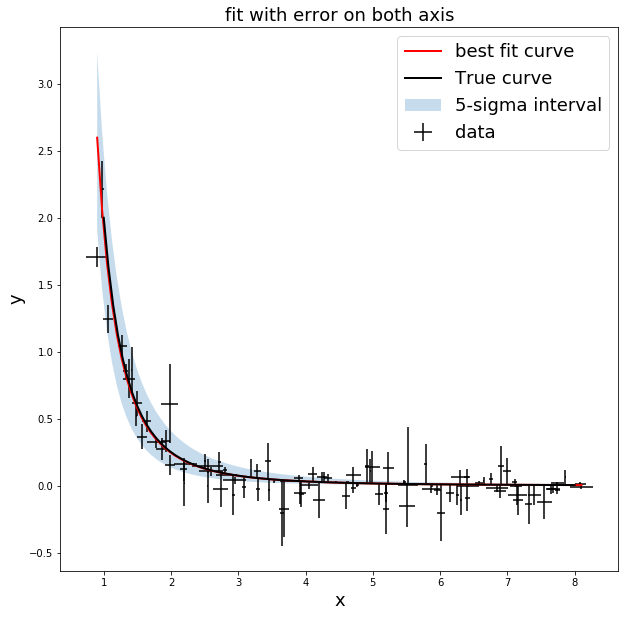

In [19]:
##### %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import odr

def func(p, x):
    a, b = p
    return a * x**b

# Model object
quad_model = odr.Model(func)

# test data and error
x0 = np.linspace(1, 8, 100)
y0 = 2 * x0** -3
noise_x = np.random.normal(0.0, 0.1, len(x0))
noise_y = np.random.normal(0.0, 0.1, len(x0))
y = y0 + noise_y
x = x0 + noise_x

# Create a RealData object
data = odr.RealData(x, y, sx=noise_x, sy=noise_y)

# Set up ODR with the model and data.
odr = odr.ODR(data, quad_model, beta0=[0.1, -0.1])

# Run the regression.
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta
print('fit parameter 1-sigma error')
print('———————————–')
for i in range(len(popt)):
    print(str(popt[i])+' +- '+str(perr[i]))
out.pprint()

# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

x_fit = np.linspace(min(x), max(x), 100)
fit = func(popt, x_fit)
fit_up = func(popt_up, x_fit)
fit_dw= func(popt_dw, x_fit)

#plot
fig, ax = plt.subplots(1, figsize=(10,10))
ax.errorbar(x, y, yerr=noise_y, xerr=noise_x, ecolor='k', fmt='None', label='data')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.title('fit with error on both axis', fontsize=18)
plt.plot(x_fit, fit, 'r', lw=2, label='best fit curve')
plt.plot(x0, y0, 'k-', lw=2, label='True curve')
ax.fill_between(x_fit, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
ax.legend(fontsize=18)
plt.show()

In [1]:
import pandas as pd
import numpy as np

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [8]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    print('mean data\n', np.mean(data))
    print('x minus mu\n', x_minus_mu)
    if not cov:
        cov = np.cov(data.values.T)
    print('cov\n', cov)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth', 'price']].head(500)
# print('df_x\n', df_x)
# print('df\n',df[['carat', 'depth', 'price']])
df_x['mahala'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

mean data
 carat       0.797940
depth      61.749405
price    3932.799722
dtype: float64
x minus mu
        carat     depth        price
0   -0.56794 -0.249405 -3606.799722
1   -0.58794 -1.949405 -3606.799722
2   -0.56794 -4.849405 -3605.799722
3   -0.50794  0.650595 -3598.799722
4   -0.48794  1.550595 -3597.799722
..       ...       ...          ...
495 -0.08794  0.950595 -1110.799722
496 -0.08794 -0.449405 -1110.799722
497 -0.09794 -1.549405 -1110.799722
498 -0.09794 -1.049405 -1110.799722
499  0.10206  2.250595 -1110.799722

[500 rows x 3 columns]
cov
 [[ 2.24686660e-01  1.91665282e-02  1.74276536e+03]
 [ 1.91665282e-02  2.05240384e+00 -6.08537121e+01]
 [ 1.74276536e+03 -6.08537121e+01  1.59156294e+07]]


,carat,depth,price,mahala
0,0.23,61.5,326,1.709860
1,0.21,59.8,326,3.540097
2,0.23,56.9,327,12.715021
3,0.29,62.4,334,1.454469
4,0.31,63.3,335,2.347239
